In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [5]:
iris = load_iris()
X = iris.data
y = iris.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (150, 4)
Shape of y: (150,)


In [6]:
def k_fold_cv(X, y, k=5, n_neighbors=3):
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    X = X[indices]
    y = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.vstack((X[:start], X[end:]))
        y_train = np.hstack((y[:start], y[end:]))

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    return np.mean(accuracies)


In [7]:
average_accuracy = k_fold_cv(X, y, k=5, n_neighbors=3)
print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.9666666666666668


In [8]:
avg_accuracy = k_fold_cv(X, y, k=5, n_neighbors=3)

print(f"Average k-NN accuracy (k-Fold CV): {avg_accuracy:.3f}")


Average k-NN accuracy (k-Fold CV): 0.953


In [9]:
from sklearn.linear_model import LinearRegression

def bootstrap_regression(X, y, n_bootstraps=1000):
    n_samples = len(X)
    coefs = []

    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        y_boot = y[indices]

        model = LinearRegression()
        model.fit(X_boot, y_boot)

        coefs.append(model.coef_)

    return np.array(coefs)


In [10]:

X_reg = X[:, :2]


y_reg = X[:, 2]


In [11]:
coefs = bootstrap_regression(X_reg, y_reg, n_bootstraps=500)

print("Bootstrap coefficient means:")
print(np.mean(coefs, axis=0))


Bootstrap coefficient means:
[ 1.77841417 -1.34467256]


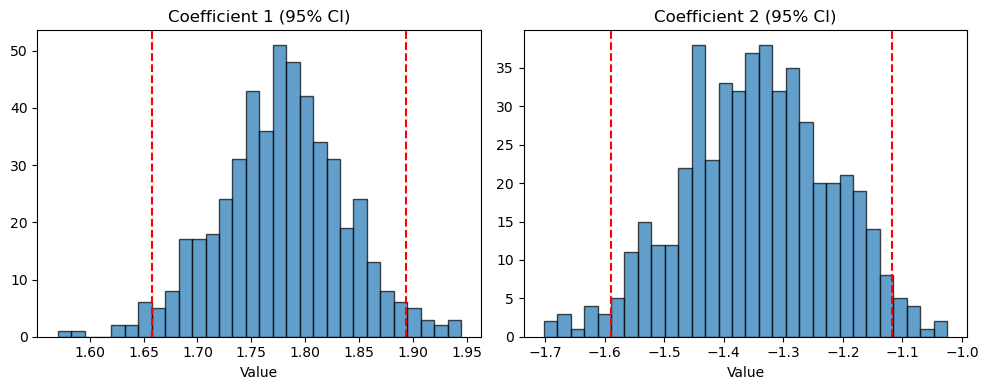

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(coefs[:, 0], bins=30, alpha=0.7, edgecolor='black')

plt.axvline(np.percentile(coefs[:, 0], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 0], 97.5), color='red', linestyle='--')

plt.title("Coefficient 1 (95% CI)")
plt.xlabel("Value")

plt.subplot(1, 2, 2)
plt.hist(coefs[:, 1], bins=30, alpha=0.7, edgecolor='black')

plt.axvline(np.percentile(coefs[:, 1], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 1], 97.5), color='red', linestyle='--')

plt.title("Coefficient 2 (95% CI)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


In [13]:
print("\nBootstrap results (95% confidence intervals):")

for i in range(coefs.shape[1]):
    lower = np.percentile(coefs[:, i], 2.5)
    upper = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{lower:.3f}, {upper:.3f}]")



Bootstrap results (95% confidence intervals):
Coefficient 1: [1.658, 1.894]
Coefficient 2: [-1.590, -1.118]


In [14]:
from sklearn.model_selection import KFold
import numpy as np


In [15]:
# Create sample data
X = np.arange(100)
y = X * 2


In [16]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [17]:
# Perform K-Fold split
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold}")
    print("Train size:", len(train_index))
    print("Test size :", len(test_index))
    print("-" * 30)
    
    fold += 1


Fold 1
Train size: 80
Test size : 20
------------------------------
Fold 2
Train size: 80
Test size : 20
------------------------------
Fold 3
Train size: 80
Test size : 20
------------------------------
Fold 4
Train size: 80
Test size : 20
------------------------------
Fold 5
Train size: 80
Test size : 20
------------------------------
